<a href="https://colab.research.google.com/github/tej007-awesome/Machine-Learning-Projects/blob/main/LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Local Outlier Factor Algorithm
The LOF algorithm is a density-based outlier detection method that identifies outliers based on their local density compared to their neighbors. It is well-suited for detecting outliers in datasets with varying densities.

 The visualization of the dataset with the circles proportional to the outlier scores provides a clear representation of the identified outliers. The larger the circle, the more likely the data point is an outlier.

<ipython-input-5-dcdefa94c2e7>:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-5-dcdefa94c2e7>:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes=[20]


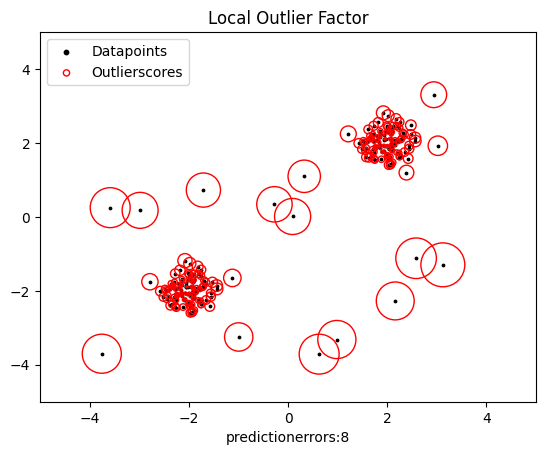

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# Set a random seed for reproducibility
np.random.seed(42)
# Generate inlier data points
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers=np.r_[X_inliers+2,X_inliers-2]
# Generate outlier data points
X_outliers=np.random.uniform(low=-4,high=4,size=(20,2))
X = np.r_[X_inliers, X_outliers]
n_outliers= len(X_outliers)
ground_truth=np.ones(len(X),dtype=int)
ground_truth[-n_outliers:] = -1
# Initialize the Local Outlier Factor (LOF) model
# Set n_neighbors to 20 and the expected contamination rate to 10%
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred= clf.fit_predict(X)
# Calculate the number of prediction errors
n_errors=(y_pred!=ground_truth).sum()
X_scores = clf.negative_outlier_factor_
# Plot the results
plt.title("LocalOutlierFactor(LOF)")
plt.scatter(X[:,0],X[:,1],color="k",s=3.0,label="Datapoints")
# plot circles with radius proportional to the outlier scores
radius=(X_scores.max()-X_scores)/(X_scores.max()-X_scores.min())
plt.scatter(
X[:,0],
X[:,1],
s=1000 * radius, edgecolors="r",
facecolors="none", label="Outlierscores",
)
plt.axis("tight")
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.xlabel("predictionerrors:%d"%(n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes=[20]
plt.title("Local Outlier Factor")
plt.show()